# Descriptor evaluation on the HPatches dataset

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import brewer2mpl

from lisrd.evaluation.descriptor_evaluation import run_descriptor_evaluation
%matplotlib inline
%load_ext autoreload
%autoreload 2

## Illumination changes

In [2]:
config = {
    'name': 'hpatches',
    'data_path': '/home/remi/Documents/datasets/HPatches_sequences/',
    'alteration': 'i',
    'batch_size': 1,
    'test_batch_size': 1,
    'sizes': {'test': 285},
    'resize': [480, 640],
    'models_name': ['kornia_sift', 'hard_net', 'sos_net', 'superpoint', 'd2_net', 'r2d2', 'gift', 'lisrd'],
    'num_kp': 1000,
    'correctness_threshold': 3,
    'max_mma_threshold': 10
}

In [3]:
H_estimation_i, precision_i, recall_i, mma_i = run_descriptor_evaluation(config)

  0%|          | 0/285 [00:00<?, ?it/s]/home/remi/env_cvg/lib/python3.7/site-packages/torch/nn/functional.py:3384: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior has changed "
100%|██████████| 285/285 [04:53<00:00,  1.03s/it]


In [4]:
metrics_i = {'Homography estimation': H_estimation_i, 'Precision': precision_i, 'Recall': recall_i}
for metric, value in metrics_i.items():
    print(metric)
    for m in config['models_name']:
        print(m + ':', value[m])
    print()

Homography estimation
kornia_sift: 0.9333333333333333
hard_net: 0.9403508771929825
sos_net: 0.9333333333333333
superpoint: 0.9122807017543859
d2_net: 0.9052631578947369
r2d2: 0.9368421052631579
gift: 0.9438596491228071
lisrd: 0.9473684210526315

Precision
kornia_sift: 0.7814668489337294
hard_net: 0.7018632301523557
sos_net: 0.747846007673818
superpoint: 0.7097122272108113
d2_net: 0.7250510103286282
r2d2: 0.7713281612812792
gift: 0.7014761240791423
lisrd: 0.7654595787015849

Recall
kornia_sift: 0.7985949067103927
hard_net: 0.7312564340404616
sos_net: 0.8211819059440518
superpoint: 0.8110394621011607
d2_net: 0.7750460070551969
r2d2: 0.8142594637050821
gift: 0.6807199062715257
lisrd: 0.919741569466567



## Viewpoint changes

In [5]:
config['alteration'] = 'v'
config['sizes'] = {'test': 295}
H_estimation_v, precision_v, recall_v, mma_v = run_descriptor_evaluation(config)

100%|██████████| 295/295 [05:31<00:00,  1.12s/it]


In [6]:
metrics_v = {'Homography estimation': H_estimation_v, 'Precision': precision_v, 'Recall': recall_v}
for metric, value in metrics_v.items():
    print(metric)
    for m in config['models_name']:
        print(m + ':', value[m])
    print()

Homography estimation
kornia_sift: 0.5661016949152542
hard_net: 0.6644067796610169
sos_net: 0.6983050847457627
superpoint: 0.6711864406779661
d2_net: 0.6169491525423729
r2d2: 0.6203389830508474
gift: 0.6983050847457627
lisrd: 0.688135593220339

Precision
kornia_sift: 0.6506764346362675
hard_net: 0.7006170261724549
sos_net: 0.7271578338500188
superpoint: 0.6852562871168503
d2_net: 0.6662432027554812
r2d2: 0.6661881245757615
gift: 0.6865851404683905
lisrd: 0.7305360618193362

Recall
kornia_sift: 0.5272233342870664
hard_net: 0.7335794158486386
sos_net: 0.7601566467915619
superpoint: 0.7502009544127654
d2_net: 0.6641766541573937
r2d2: 0.6389377317008912
gift: 0.6599955223070748
lisrd: 0.7573480641226967



## MMA curves

In [7]:
def plot_mma(config, captions, mma_i, mma_v):
    models = config['models_name']
    n_models = len(models)
    
    colors = np.array(brewer2mpl.get_map('Set2', 'qualitative', 8).mpl_colors)[:n_models]
    linestyles = ['-'] * n_models
    plt_lim = [1, config['max_mma_threshold']]
    plt_rng = np.arange(plt_lim[0], plt_lim[1] + 1)

    plt.rc('axes', titlesize=25)
    plt.rc('axes', labelsize=25)
    plt.figure(figsize=(15, 5))
    
    # Full evaluation
    plt.subplot(1, 3, 1)
    n_i = 285
    n_v = 295
    for model, caption, color, ls in zip(models, captions, colors, linestyles):
        i_err, v_err = mma_i[model], mma_v[model]
        plt.plot(plt_rng, (n_i * i_err + n_v * v_err) / (n_i + n_v),
                 color=color, ls=ls, linewidth=3, label=caption)
    plt.title('Overall')
    plt.xlabel('Threshold [px]')
    plt.xlim(plt_lim)
    plt.xticks(plt_rng)
    plt.ylabel('Precision')
    plt.ylim([0.3, 1])
    plt.grid()
    plt.tick_params(axis='both', which='major', labelsize=20)

    # Plot for the illumination split
    plt.subplot(1, 3, 2)
    for model, caption, color, ls in zip(models, captions, colors, linestyles):
        plt.plot(plt_rng, mma_i[model], color=color, ls=ls, linewidth=3, label=caption)
    plt.title('Illumination')
    plt.xlabel('Threshold [px]')
    plt.xlim(plt_lim)
    plt.xticks(plt_rng)
    plt.ylim([0.3, 1])
    plt.gca().axes.set_yticklabels([])
    plt.grid()
    plt.tick_params(axis='both', which='major', labelsize=20)

    # Plot for the viewpoint split
    plt.subplot(1, 3, 3)
    for model, caption, color, ls in zip(models, captions, colors, linestyles):
        plt.plot(plt_rng, mma_v[model], color=color, ls=ls, linewidth=3, label=caption)
    plt.title('Viewpoint')
    plt.xlabel('Threshold [px]')
    plt.xlim(plt_lim)
    plt.xticks(plt_rng)
    plt.ylim([0.3, 1])
    plt.gca().axes.set_yticklabels([])
    plt.grid()
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.legend(bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0, fontsize=20)

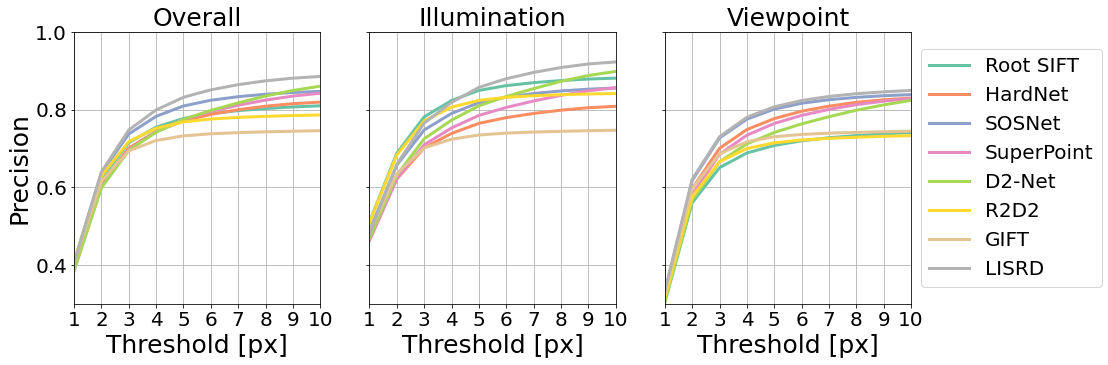

In [8]:
captions = ['Root SIFT', 'HardNet', 'SOSNet', 'SuperPoint', 'D2-Net', 'R2D2', 'GIFT', 'LISRD']
plot_mma(config, captions, mma_i, mma_v)